# Class Graph Activity

In [2]:
import numpy as np
import pandas as pd
import networkx as nx
import matplotlib.pyplot as plt

# Task 1: Import responses

In [41]:
#Read CSV
resps = pd.read_csv('TEST DS Class Name Sociogram Responses.csv')

#Display contents
resps

,Timestamp,What is your name?,Which other students have you talked to in the past week?
0,4/18/2019 13:23,Student 1,"Student 2, Student 3, Student 5"
1,4/18/2019 13:24,Student 2,"Student 1, Student 2, Student 3"
2,4/18/2019 13:24,Student 3,"Student 1, Student 4, Student 5"
3,4/18/2019 13:24,Student 4,"Student 1, Student 2, Student 3, Student 4, St..."
4,4/18/2019 13:24,Student 5,Student 4
5,4/18/2019 13:24,Student 5,Student 4


# Task 2: Scrub responses for use with NetworkX

In [56]:
#Use loop to add connections to new edges_df DataFrame

#Create new dataframe to put edges into
edges_df = pd.DataFrame(columns=['Respondent', 'Contact'])


#Create list of students
students = resps['What is your name?'].unique()

#Loop through students
for respondent in students:
    
    #Subset dataframe to responses from the one respondent
    resp_df = resps[resps['What is your name?'] == respondent]
    
    #Extract contact responses 
    contact_vals = resp_df['Which other students have you talked to in the past week?'].values
    
    #Loop through contact responses
    for contact in students:
        
        #Exclude self-connections
        if (respondent == contact):
            continue
        
        #Loop through responses looking for a match with contact, then exit loop
        for resp in contact_vals:
            if contact in resp:
                edges_df = edges_df.append(pd.DataFrame({'Respondent': respondent, 'Contact': contact}, index = [0]), ignore_index = True)
                break
                
#Display scrubbed dataframe                
print(edges_df)

#Create edge list for use with NetworkX
edges_list = list(edges_df.itertuples(index=False, name=None))

   Respondent    Contact
0   Student 1  Student 2
1   Student 1  Student 3
2   Student 1  Student 5
3   Student 2  Student 1
4   Student 2  Student 3
5   Student 3  Student 1
6   Student 3  Student 4
7   Student 3  Student 5
8   Student 4  Student 1
9   Student 4  Student 2
10  Student 4  Student 3
11  Student 4  Student 5
12  Student 5  Student 4


# Task 3: Use NetworkX to visualize the network

Draw both a directed graph and an undirected graph. We will use the undirected graph for the rest of the activity.

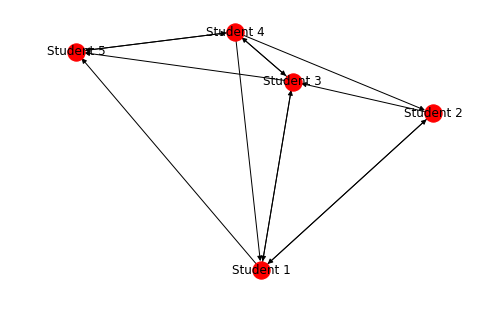

In [43]:
#Directed Graph
DG = nx.DiGraph()
DG.add_edges_from(edges_list)
nx.draw(DG, with_labels=True)
plt.show()

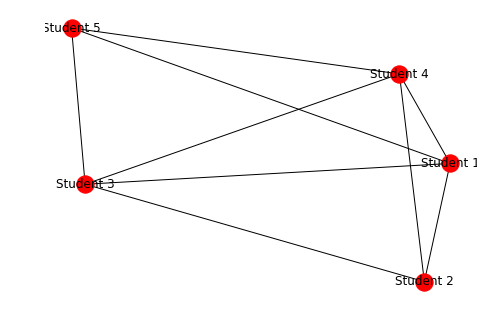

In [55]:
#Undirected Graph
GA = nx.from_edgelist(edges_list)
nx.draw(GA, with_labels=True)
plt.show()

# Task 4: Explore the Network

Use the undirected graph to answer the questions below.

**Question 1:** How many students are in the class? Use the graph object to output the answer.

**Question 2:** How many connections are there between students in the class? Use the graph object to output the answer.

**Question 3:** How well connected is the class as a whole?

**Question 4:** Can you find any distinguishable sub-groups or cliques within our class?

**Question 5:** Who are the most and least "connected" students in this graph? Explain how you defined "connected", and what the implications are for the students you identified.

# Task 5: Implications

**Question 6:** As your instructor, I am interested in improving our class cohesion. What recommendations might you make to me based on these findings?

# Level Up: Explore your ego network

Graph your ego network with radius 2

**Question 7:** How well connected is your ego network?

# Hints

*Task 3:* 
```
#Directed Graph
DG = nx.DiGraph()
DG.add_edges_from(edges_list)
nx.draw(DG, with_labels=True)
plt.show()

#Undirected Graph
GA = nx.from_edgelist(edges_list)
nx.draw(GA, with_labels=True)
plt.show()
```

*Q1:* ```print(len(GA.nodes))```

*Q2:* ```print(len(GA.edges))```

*Q3:* Some approaches to this could be to look at whether the graph is connected, the number of nodes/edges, the network density, or the longest of the shortest paths between two students.

*Q4:* The Girvan-Newman algorithm might be helpful here. You can look at the results of the first iteration, or you can look at later iterations. Then compare the results with the visualized graph to determine if you think the algorithm worked well.

*Q5:* Measures of centrality are useful here - you'll need to pick one that you think best captures the notion of being "connected". Or you can look at multiple measures if you have trouble deciding.

*Q7:* Look at the clustering coefficient for your ego network